Open in colab: https://colab.research.google.com/drive/16Tuubwbp2UCRUSXb4tRjyN8Ci8FWw_gO#scrollTo=f-gJAmoq2Ppz

## Exercise1: Zipf's Law of Abbreviation (English-Finnish)

*Notebook created by Alba Prados, Daniel J Casas and Yutong Zhang for the NLP class of the Master's in Theoretical and Applied Linguistics at Universitat Pompeu Fabra.*

*Some snippets of code are from [this source](https://colab.research.google.com/github/brochhagen/nlpupf/blob/main/material/2024q2/session01/session0102.ipynb#scrollTo=11eaae8b) by Thomas Brochhagen.*

# 1. Load libraries

In [ ]:
#importing libraries we'll use
import urllib.request
import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from math import log
import re

# English

URL: https://www.gutenberg.org/cache/epub/41566/pg41566.txt

Genre: Religion

Title: Curiosities of Superstition, and Sketches of Some Unrevealed Religions

Author: W. H. Davenport Adams

# 0. spaCy

In [ ]:
#download small Spicy model for English
!python -m spacy download en_core_web_sm

#import small model for Engish
import en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# 1. Load text

In [ ]:
# Remove all the unnecessary content
def remove_gutenberg_copyright(text_path):
    with open(text_path, 'r', encoding='utf-8') as file:
        text = file.read()

    start_marker = "The original text includes Arabic characters that have been replaced with [Arabic]."
    end_marker = "*** END OF THIS PROJECT GUTENBERG EBOOK"

    start_index = text.find(start_marker) + len(start_marker)
    end_index = text.find(end_marker)

    if start_index > len(start_marker) and end_index > start_index:
        return text[start_index:end_index].strip()
    else:
        return text

In [ ]:
book_url_en = 'https://www.gutenberg.org/cache/epub/41566/pg41566.txt' # URL of book we want to read in

book_text_en = urllib.request.urlopen(book_url_en) # Open URL as "book_text"
book_text_en = book_text_en.read()                 # Returns all bytes from "book_text"
book_text_en = book_text_en.decode("utf-8")        # Decode as UTF-8

# 2. Pre-processing

In [ ]:
# creating Spacy pipe line
nlp = en_core_web_sm.load()

# Spicy has a limit of 100,000 tokens
doc = nlp(book_text_en[:99999])

# All tokens that arent stop words or punctuations
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]

# Noun tokens that arent stop words or punctuations
nouns = [token.text
         for token in doc
         if (not token.is_stop and
             not token.is_punct and
             token.pos_ == "NOUN")]

# Clean and filter words
cleaned_words = [word for word in words if word.strip() and word != '\r\n']

# Count the frequency of words
word_freq_en = Counter(cleaned_words)

# Clean and filter nouns
cleaned_nouns = [noun for noun in nouns if noun.strip() and noun != '\r\n']

# Count the frequency of nouns
noun_freq_en = Counter(cleaned_nouns)

# Get the most common words with their lengths and frequencies
common_words_en = word_freq_en.most_common()

# Get the most common nouns with their lengths and frequencies
common_nouns_en = noun_freq_en.most_common()

# 3. Analysis

In [ ]:
# Print common words in English
common_words_en

[('Buddha', 58),
 ('day', 35),
 ('life', 29),
 ('existence', 27),
 ('Hiouen', 27),
 ('Master', 27),
 ('religious', 26),
 ('thsang', 26),
 ('world', 22),
 ('men', 22),
 ('Law', 22),
 ('great', 21),
 ('man', 20),
 ('human', 20),
 ('place', 20),
 ('God', 20),
 ('mind', 18),
 ('time', 18),
 ('sacred', 18),
 ('India', 18),
 ('disciples', 18),
 ('having', 17),
 ('gods', 17),
 ('sun', 16),
 ('death', 16),
 ('prayer', 15),
 ('Buddhist', 15),
 ('Buddhism', 15),
 ('said', 15),
 ('soul', 15),
 ('way', 14),
 ('religion', 14),
 ('works', 14),
 ('water', 14),
 ('nature', 14),
 ('Nirvâna', 14),
 ('worship', 13),
 ('people', 13),
 ('old', 13),
 ('years', 13),
 ('light', 13),
 ('body', 13),
 ('sacrifice', 13),
 ('shadow', 13),
 ('knowledge', 13),
 ('saw', 12),
 ('found', 12),
 ('like', 12),
 ('right', 12),
 ('system', 12),
 ('shall', 12),
 ('object', 12),
 ('seen', 11),
 ('end', 11),
 ('faith', 11),
 ('came', 11),
 ('new', 11),
 ('thousand', 11),
 ('early', 11),
 ('flowers', 11),
 ('second', 11),
 ('ea

In [ ]:
# Print common nouns in English
common_nouns_en

[('day', 35),
 ('life', 29),
 ('existence', 27),
 ('world', 22),
 ('men', 22),
 ('man', 19),
 ('place', 19),
 ('mind', 18),
 ('time', 18),
 ('disciples', 18),
 ('gods', 17),
 ('sun', 16),
 ('death', 16),
 ('prayer', 15),
 ('soul', 15),
 ('way', 14),
 ('religion', 14),
 ('water', 14),
 ('nature', 14),
 ('worship', 13),
 ('people', 13),
 ('years', 13),
 ('body', 13),
 ('sacrifice', 13),
 ('shadow', 13),
 ('knowledge', 13),
 ('works', 13),
 ('system', 12),
 ('object', 12),
 ('faith', 11),
 ('flowers', 11),
 ('earth', 11),
 ('light', 11),
 ('convent', 11),
 ('self', 10),
 ('temple', 10),
 ('power', 10),
 ('night', 10),
 ('thought', 10),
 ('age', 10),
 ('philosophy', 10),
 ('pilgrim', 10),
 ('prayers', 9),
 ('cylinder', 9),
 ('wheel', 9),
 ('books', 9),
 ('priests', 9),
 ('moon', 9),
 ('period', 9),
 ('pain', 9),
 ('times', 8),
 ('feet', 8),
 ('history', 8),
 ('course', 8),
 ('idea', 8),
 ('birth', 8),
 ('capital', 8),
 ('cave', 8),
 ('end', 7),
 ('number', 7),
 ('wood', 7),
 ('creed', 7),


# 4. Visualization

In [ ]:
# Creating a DataFrame 'df_en' with the columns 'word' and 'frequency' from the 'common_words_en' data
df_en = pd.DataFrame(common_words_en, columns=['word', 'frequency'])

# Adding a new column 'length' to the DataFrame, representing the length of each word
df_en['length'] = df_en['word'].apply(len)

# Sorting the DataFrame by the 'frequency' column in descending order
df_en = df_en.sort_values(by=['frequency'], ascending=False)

# Adding a new column 'rank' to the DataFrame, representing the rank of each word based on frequency
df_en['rank'] = list(range(1, len(df_en) + 1))

# Displaying the resulting DataFrame
df_en

,word,frequency,length,rank
0,Buddha,58,6,1
1,day,35,3,2
2,life,29,4,3
3,existence,27,9,4
4,Hiouen,27,6,5
...,...,...,...,...
2160,adverse,1,7,3809
2161,circumstances,1,13,3810
2162,yearns,1,6,3811
2163,intensely,1,9,3812


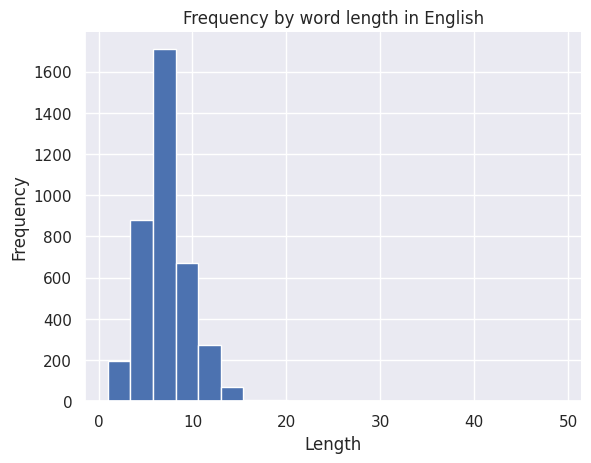

In [ ]:
# Visualization Frequency by Word Length
df_en['length'].plot(kind='hist', bins=20, title='Frequency by word length in English')
plt.xlabel('Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

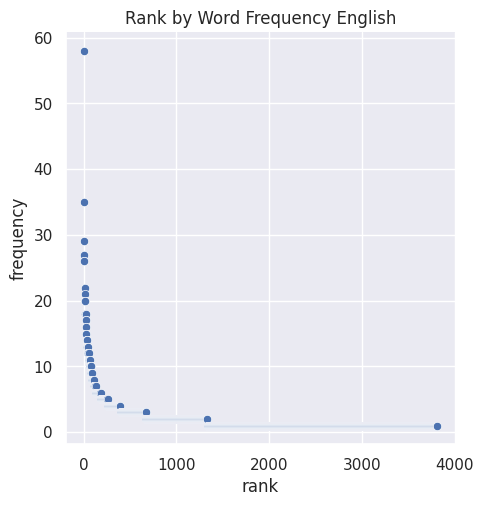

In [ ]:
# Visualization Rank by Word Frequency
sns.relplot(x="rank", y="frequency", data=df_en);
plt.title("Rank by Word Frequency English")
plt.show()
plt.close()

In [ ]:
# Log the frequencies
df_en['logfreq'] = [log(x+1) for x in df_en['frequency']]

#print frequency by logfreq
df_en

,word,frequency,length,rank,logfreq
0,Buddha,58,6,1,4.077537
1,day,35,3,2,3.583519
2,life,29,4,3,3.401197
3,existence,27,9,4,3.332205
4,Hiouen,27,6,5,3.332205
...,...,...,...,...,...
2160,adverse,1,7,3809,0.693147
2161,circumstances,1,13,3810,0.693147
2162,yearns,1,6,3811,0.693147
2163,intensely,1,9,3812,0.693147


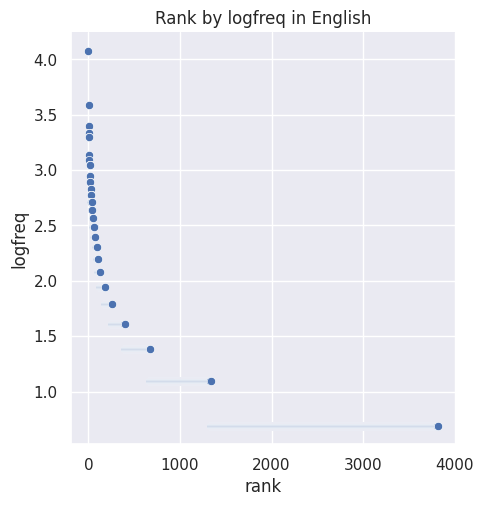

In [ ]:
sns.relplot(x="rank", y="logfreq", data=df_en);
plt.title("Rank by logfreq in English")
plt.show()
plt.close()

# Finnish

URL: https://www.gutenberg.org/cache/epub/49028/pg49028.txt

Genre: Religious

Title: Suomalaisten runojen uskonto by Kaarle Krohn

# 0. spaCy

In [ ]:
#download small Spacy model for Finish
!python -m spacy download fi_core_news_sm

#importing small Finish model
import fi_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 42.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fi_core_news_sm')


# 1. Load text

In [ ]:
# Remove all the unnecessary content
def remove_gutenberg_copyright(text_path):
    with open(text_path, 'r', encoding='utf-8') as file:
        text = file.read()

    #setting start and end markers to remove unwanted text in English, leaving only Finnish text
    start_marker = "Produced by Jari Koivisto"
    end_marker = "End of Project Gutenberg's Suomalaisten runojen uskonto, by Kaarle Krohn"

    start_index = text.find(start_marker) + len(start_marker)
    end_index = text.find(end_marker)

    if start_index > len(start_marker) and end_index > start_index:
        return text[start_index:end_index].strip()
    else:
        return text

In [ ]:
# URL of book we want to read in Finnish
book_url_fi = 'https://www.gutenberg.org/cache/epub/49028/pg49028.txt'

book_text_fi = urllib.request.urlopen(book_url_fi) # Open URL as "book_text"
book_text_fi = book_text_fi.read() # Returns all bytes from "book_text"
book_text_fi = book_text_fi.decode("utf-8") # Decode as UTF-8

# 2. Pre-processing

In [ ]:
# creating Spacy pipe line
nlp = fi_core_news_sm.load()

# turn Finnish book into a Spacy doc object
doc = nlp(book_text_fi)

# All tokens that arent stop words or punctuations
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]

# Noun tokens that arent stop words or punctuations
nouns = [token.text
         for token in doc
         if (not token.is_stop and
             not token.is_punct and
             token.pos_ == "NOUN")]


# Clean and filter words
pattern = re.compile(r'\b(?:[A-Z]\. ?){1,}[A-Z]?\.?')

# Clean and filter words
cleaned_words_fi = [word for word in words if word.strip() and word != '\r\n' and not pattern.match(word)]

# Count the frequency of words
word_freq_fi = Counter(cleaned_words_fi)

# Clean and filter nouns
cleaned_nouns_fi = [noun for noun in nouns if noun.strip() and noun != '\r\n' and not pattern.match(noun)]

# Count the frequency of nouns
noun_freq_fi = Counter(cleaned_nouns_fi)

# Get the most common words with their lengths and frequencies
common_words_fi = word_freq_fi.most_common()

# Get the most common nouns with their lengths and frequencies
common_nouns_fi = noun_freq_fi.most_common()

# 3. Analysis

In [ ]:
# print common words in Finnish
common_words_fi

[('poika', 229),
 ('metsän', 185),
 ('tavataan', 179),
 ('emäntä', 179),
 ('the', 170),
 ('mainitaan', 157),
 ('Neitsyt', 147),
 ('esiintyy', 144),
 ('Jumalan', 138),
 ('Suomen', 130),
 ('Maarian', 129),
 ('ynnä', 120),
 ('tuli', 119),
 ('of', 112),
 ('maan', 111),
 ('Väinämöisen', 105),
 ('piti', 103),
 ('neiti', 98),
 ('Tapion', 97),
 ('sanan', 95),
 ('haltia', 93),
 ('Tuonen', 90),
 ('Project', 85),
 ('runoissa', 85),
 ('Gutenberg', 84),
 ('tyttö', 84),
 ('ett', 83),
 ('Pohjolan', 82),
 ('veden', 81),
 ('saa', 81),
 ('vaimo', 79),
 ('to', 76),
 ('Maaria', 75),
 ('saanut', 75),
 ('neito', 74),
 ('Väinämöinen', 72),
 ('or', 71),
 ('kertosanana', 71),
 ('Ukon', 71),
 ('s.o', 69),
 ('sai', 69),
 ('Jumala', 68),
 ('välistä', 68),
 ('toisinaan', 67),
 ('vanha', 67),
 ('v.', 66),
 ('a', 66),
 ('and', 65),
 ('pojan', 65),
 ('kuningas', 65),
 ('nimitys', 64),
 ('akka', 63),
 ('vastaa', 61),
 ('päivän', 61),
 ('nimi', 61),
 ('merkityksessä', 61),
 ('vettä', 60),
 ('in', 59),
 ('Pohjan', 59),


In [ ]:
# print common nouns in Finnish
common_nouns_fi

[('poika', 229),
 ('metsän', 185),
 ('emäntä', 177),
 ('Neitsyt', 133),
 ('maan', 111),
 ('sanan', 95),
 ('neiti', 86),
 ('runoissa', 85),
 ('tyttö', 84),
 ('veden', 81),
 ('vaimo', 79),
 ('haltia', 76),
 ('Väinämöisen', 68),
 ('pojan', 65),
 ('kuningas', 65),
 ('v.', 64),
 ('nimitys', 64),
 ('akka', 63),
 ('päivän', 61),
 ('nimi', 61),
 ('merkityksessä', 61),
 ('vettä', 60),
 ('isäntä', 59),
 ('karhun', 59),
 ('merkitys', 53),
 ('neito', 53),
 ('kertosanana', 51),
 ('nimen', 50),
 ('sana', 49),
 ('maahan', 48),
 ('ukko', 48),
 ('väki', 47),
 ('muoto', 47),
 ('rukoillaan', 47),
 ('mies', 47),
 ('eukko', 47),
 ('sanasta', 46),
 ('piika', 44),
 ('maasta', 42),
 ('maata', 42),
 ('säe', 42),
 ('Hiien', 39),
 ('kirkon', 39),
 ('Maarian', 39),
 ('metsä', 38),
 ('puolen', 38),
 ('talon', 38),
 ('suomalaisten', 37),
 ('alkuansa', 37),
 ('runossa', 37),
 ('emännän', 37),
 ('Hiiden', 37),
 ('haltian', 36),
 ('toisinnossa', 36),
 ('runojen', 35),
 ('vaikutuksesta', 35),
 ('Luojan', 35),
 ('muodos

# 4. Visualization

In [ ]:
# Creating a DataFrame 'df_fi' with the columns 'word' and 'frequency' from the 'common_words_fi' data
df_fi = pd.DataFrame(common_words_fi, columns=['word', 'frequency'])

# Adding a new column 'length' to the DataFrame, representing the length of each word
df_fi['length'] = df_fi['word'].apply(len)

# Sorting the DataFrame by the 'frequency' column in descending order
df_fi = df_fi.sort_values(by=['frequency'], ascending=False)

# Adding a new column 'rank' to the DataFrame, representing the rank of each word based on frequency
df_fi['rank'] = list(range(1, len(df_fi) + 1))

# Displaying the resulting DataFrame
df_fi

,word,frequency,length,rank
0,poika,229,5,1
1,metsän,185,6,2
2,tavataan,179,8,3
3,emäntä,179,6,4
4,the,170,3,5
...,...,...,...,...
17170,Järvikoiskylässä,1,16,32256
17169,Vatjalais-alueella,1,18,32257
17168,köydestä,1,8,32258
17167,uittamaan,1,9,32259


In [ ]:
# Remove "the & of" from data frame
df_fi.drop(index=[df_fi.index[4], df_fi.index[13]],
        axis=0,
        inplace=True)

# Re-do rank with new elements
df_fi.reset_index(drop=True, inplace=True)
df_fi['rank'] = range(1, len(df_fi) + 1)
df_fi

,word,frequency,length,rank
0,poika,229,5,1
1,metsän,185,6,2
2,tavataan,179,8,3
3,emäntä,179,6,4
4,mainitaan,157,9,5
...,...,...,...,...
32253,Järvikoiskylässä,1,16,32254
32254,Vatjalais-alueella,1,18,32255
32255,köydestä,1,8,32256
32256,uittamaan,1,9,32257


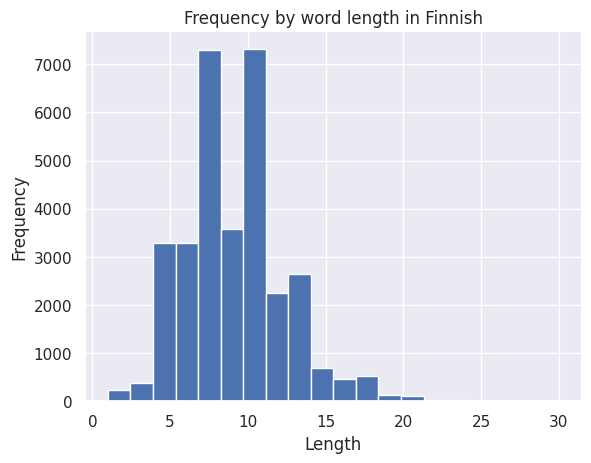

In [ ]:
# Visualization Frequency by Word Length
df_fi['length'].plot(kind='hist', bins=20, title='Frequency by word length in Finnish')
plt.xlabel('Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

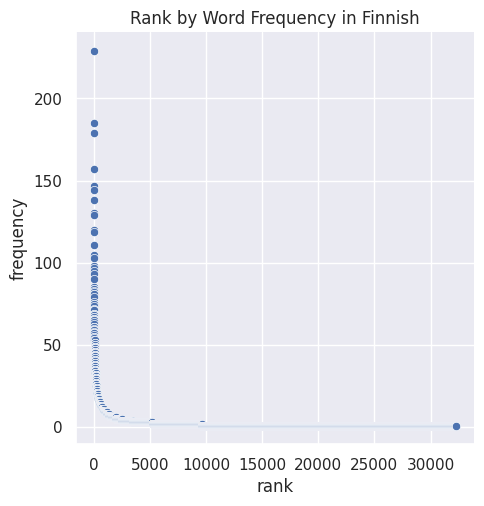

In [ ]:
# Rank by Word Frequency in Finnish
sns.relplot(x="rank", y="frequency", data=df_fi);
plt.title("Rank by Word Frequency in Finnish")
plt.show()
plt.close()

In [ ]:
#calculating frequency by logfreq
df_fi['logfreq'] = [log(x+1) for x in df_fi['frequency']]

#printm frequency by logfreq table
df_fi

,word,frequency,length,rank,logfreq
0,poika,229,5,1,5.438079
1,metsän,185,6,2,5.225747
2,tavataan,179,8,3,5.192957
3,emäntä,179,6,4,5.192957
4,mainitaan,157,9,5,5.062595
...,...,...,...,...,...
32253,Järvikoiskylässä,1,16,32254,0.693147
32254,Vatjalais-alueella,1,18,32255,0.693147
32255,köydestä,1,8,32256,0.693147
32256,uittamaan,1,9,32257,0.693147


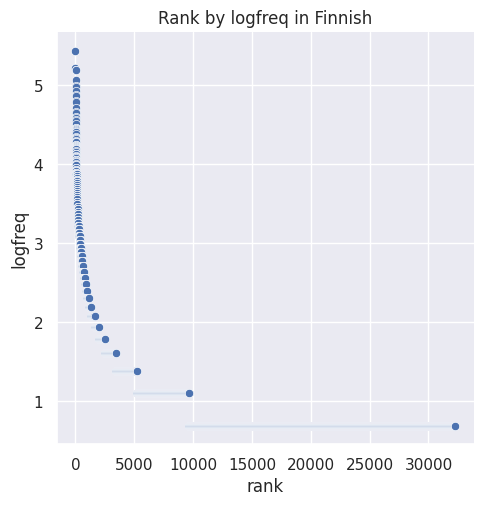

In [ ]:
# Rank by logfreq in Finnish
sns.relplot(x="rank", y="logfreq", data=df_fi);
plt.title("Rank by logfreq in Finnish")
plt.show()
plt.close()